<a href="https://colab.research.google.com/github/kaljuvee/datascience/blob/main/notebooks/oversampling/lead_scoring_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

df = pd.read_csv('data/leads_combined.csv')
df.shape

<ipython-input-19-8e5f24865311>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/leads_combined.csv')


(41006, 23)

In [20]:
df.head()

,lead_id,sold_to,bought_from_partner,loan_amount,loan_period,phone_location,phone_carrier,phone_valid,marital_status,education,...,province,city,monthly_income,income_source,using_online_banking,is_interested_in_debt_consolidation,overdue_debt_amount,negative_credit_history,months_at_work,converted
0,6172633,Vivus - Redirect,SalesDoubler CPL,1000,1,Solidaridad,AT&T Comercializacion Movil S de RL de CV,1.0,not_married,higher,...,Quintana Roo,Playa del Carmen,12000,fixed,1,0,NaN,0,42.0,0
1,6172657,Vivus - Redirect,LeadGid CPS,10000,12,Leon,Radiomovil Dipsa SA de CV,1.0,married,primary,...,Guanajuato,Leon,15,self_employed,0,0,NaN,0,42.0,0
2,6172732,Vivus - Redirect,AskRobin - Finceptiv,8900,18,Veracruz,Grupo AT&T Celullar S de RL de CV,1.0,with_partner,higher,...,Veracruz,veracruz,11999,other,0,0,NaN,0,18.0,0
3,6172771,Vivus - Redirect,Search | Non-branded | Creditos,1000,3,Tampico,AT&T Comercializacion Movil S de RL de CV,1.0,not_married,higher,...,Tamaulipas,Tampico,5000,fixed,0,0,NaN,0,18.0,0
4,6172822,Vivus - Redirect,SMS June 2022,10000,7,San Luis Rio Colorado,Pegaso PCS SA de CV,1.0,with_partner,primary,...,Sonora,San Luis Río Colorado Sonora,12000,self_employed,0,0,NaN,0,42.0,0


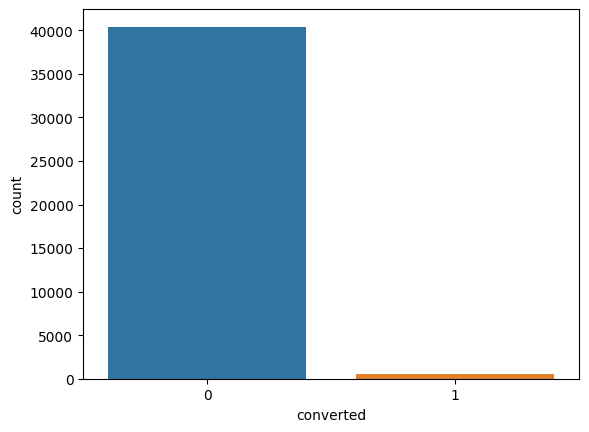

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
sns.countplot(x ='converted', data = df)
 
# Show the plot
plt.show()

In [22]:
print(df['converted'].value_counts(normalize=True))

0    0.985734
1    0.014266
Name: converted, dtype: float64


## Clean and Encode

In [23]:
df.fillna(0, inplace=True)
df.isnull().values.any()

False

In [24]:
from sklearn.preprocessing import LabelEncoder
# Encode the categorical column and store it in a new column
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

df['sold_to'] = df['sold_to'].astype(str)
df['bought_from_partner'] = df['bought_from_partner'].astype(str)
df['phone_location'] = df['phone_location'].astype(str)
df['phone_carrier'] = df['phone_carrier'].astype(str)
df['marital_status'] = df['marital_status'].astype(str)
df['education'] = df['education'].astype(str)
df['housing_tenure'] = df['housing_tenure'].astype(str)
df['post_code'] = df['post_code'].astype(str)
df['municipality'] = df['municipality'].astype(str)
df['province'] = df['province'].astype(str)
df['city'] = df['city'].astype(str)
df['income_source'] = df['income_source'].astype(str)

# Encode the categorical column and store it in a new column

df['sold_to'] = label_encoder.fit_transform(df['sold_to'])
df['bought_from_partner'] = label_encoder.fit_transform(df['bought_from_partner'])
df['phone_location'] = label_encoder.fit_transform(df['phone_location'])
df['phone_carrier'] = label_encoder.fit_transform(df['phone_carrier'])
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['education'] = label_encoder.fit_transform(df['education'])
df['housing_tenure'] = label_encoder.fit_transform(df['housing_tenure'])
df['post_code'] = label_encoder.fit_transform(df['post_code'])
df['municipality'] = label_encoder.fit_transform(df['municipality'])
df['province'] = label_encoder.fit_transform(df['province'])
df['city'] = label_encoder.fit_transform(df['city'])
df['income_source'] = label_encoder.fit_transform(df['income_source'])

df.to_csv('data/leads_orginal_encoded.csv', index = False)
df.head()

,lead_id,sold_to,bought_from_partner,loan_amount,loan_period,phone_location,phone_carrier,phone_valid,marital_status,education,...,province,city,monthly_income,income_source,using_online_banking,is_interested_in_debt_consolidation,overdue_debt_amount,negative_credit_history,months_at_work,converted
0,6172633,0,36,1000,1,346,2,1.0,2,0,...,22,2771,12000,1,1,0,0.0,0,42.0,0
1,6172657,0,21,10000,12,200,10,1.0,1,4,...,10,2045,15,9,0,0,0.0,0,42.0,0
2,6172732,0,6,8900,18,418,7,1.0,5,0,...,29,4749,11999,6,0,0,0.0,0,18.0,0
3,6172771,0,38,1000,3,352,2,1.0,2,0,...,27,3604,5000,1,0,0,0.0,0,18.0,0
4,6172822,0,33,10000,7,325,9,1.0,5,4,...,25,3194,12000,9,0,0,0.0,0,42.0,0


In [25]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Separating the independent variables from dependent variables
X = df.drop(['converted'], axis=1)
y = df['converted']

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

# summarize class distribution
print("Before resamping: ", Counter(y_train))

Before resamping:  Counter({0: 32325, 1: 479})


# SMOTE Oversampling 

In [26]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rfc_smote = RandomForestClassifier()
rfc_smote.fit(X_train_resampled, y_train_resampled)

y_pred = rfc_smote.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8096
           1       0.03      0.01      0.01       106

    accuracy                           0.98      8202
   macro avg       0.51      0.50      0.50      8202
weighted avg       0.97      0.98      0.98      8202



# Oversample with SMOTE

Imbalanced datasets are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can severely bias the learning process towards the majority class, making the machine learning classifier more likely to predict majority class values.

SMOTE helps to overcome this issue by creating synthetic observations based upon the existing minority observations. Here's how it works:

For each instance from the minority class, calculate the k nearest neighbors (k-NN).
Depending on the amount of oversampling required, neighbors are randomly chosen from the k nearest neighbors.
For each chosen neighbor, synthetic examples are created at a randomly chosen point between the two examples in the feature space.
This method helps to "even out" the imbalance by augmenting the minority class through generating synthetic examples, rather than by oversampling with replacement (which simply creates exact copies of existing examples). This leads to a more robust model that isn't as biased towards the majority class.

In [28]:
resampled_data = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled)], axis=1)
resampled_data.columns = df.columns

In [29]:
resampled_data = resampled_data.sample(frac=1).reset_index(drop=True)
resampled_data['converted'].value_counts()


1    32325
0    32325
Name: converted, dtype: int64

In [30]:
resampled_data.to_csv('data/leads_resampled_encoded.csv')

In [31]:
resampled_data.head()

,lead_id,sold_to,bought_from_partner,loan_amount,loan_period,phone_location,phone_carrier,phone_valid,marital_status,education,...,province,city,monthly_income,income_source,using_online_banking,is_interested_in_debt_consolidation,overdue_debt_amount,negative_credit_history,months_at_work,converted
0,6400812,0,15,7498,7,299,10,1.0,3,2,...,20,1416,7908,0,1,0,922.768148,0,42.0,1
1,6790021,0,41,10000,12,62,9,1.0,0,0,...,26,4165,40000,9,1,0,0.000000,0,42.0,1
2,6639749,0,9,10000,3,396,8,1.0,2,0,...,16,3505,18828,1,1,0,0.000000,0,42.0,1
3,7162267,0,29,1000,2,189,10,1.0,5,6,...,5,1906,1200,2,0,1,3000.000000,0,42.0,0
4,7166173,0,29,10000,12,376,0,1.0,0,0,...,20,4525,4500,0,0,0,0.000000,0,42.0,0


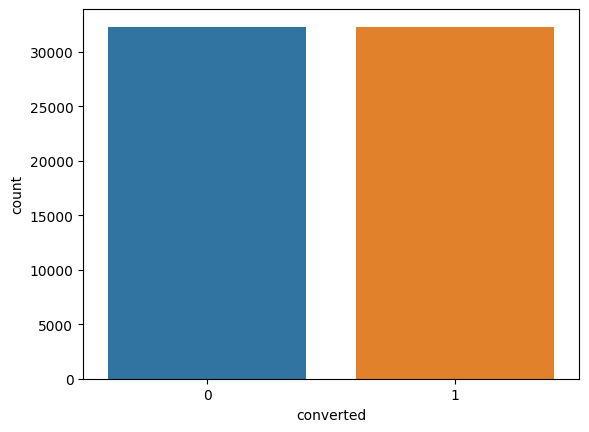

In [32]:
# count plot on single categorical variable
sns.countplot(x ='converted', data = resampled_data)
 
# Show the plot
plt.show()

In [ ]:
categorical_columns = ['sold_to', 'bought_from_partner', 'phone_location', 'phone_carrier', 
                  'marital_status', 'education', 'housing_tenure', 'post_code', 'municipality', 'province', 'city', 'income_source']
le = LabelEncoder()
#for col in categorical_columns:
 #   le.fit(df[col])
  #  X_resampled[col] = le.inverse_transform(X_resampled[col])
